In [1]:
import pandas as pd

In [2]:
# data = pd.read_csv('Covid Data.csv')
data = pd.read_csv('Covid Data.csv')

In [3]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
data['ICU'].value_counts() #1=yes, 2=no

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [5]:
data['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [6]:
data['SEX'].value_counts() #1 = female, 2 = male

SEX
1    525064
2    523511
Name: count, dtype: int64

In [7]:
male_97preg = len(data[(data['SEX']==2) & (data['PREGNANT'] ==97)]) #checks to see if males (sex=2) make up all of the pregnant = 97 rows
print(male_97preg)                                                  #number should be the same as above and it is

523511


In [8]:
data['PREGNANT'] = data['PREGNANT'].replace(97,2)                  #replaces 97s in the pregnant column with 2s since they are not pregnant
data['PREGNANT'].value_counts()                                   #checks to make sure it worked and that we now have the right # of 2s and 1s

PREGNANT
2     1036690
1        8131
98       3754
Name: count, dtype: int64

In [9]:
drop = ['DATE_DIED','MEDICAL_UNIT','USMER','INTUBED'] #drop these columns bc they aren't relevant for analysis
data = data.drop(drop, axis=1)
data.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2
3,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97


In [10]:
#remove patient_type = 1 bc they were not hospitalized and pregnant = 98 bc it's missing data
data['PATIENT_TYPE'].value_counts()
data = data[data['PATIENT_TYPE']==2]
data['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
2    200031
Name: count, dtype: int64

In [11]:
#count values for classificatin variable
data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
3    107405
7     65537
6     17230
5      5366
1      2202
2      1685
4       606
Name: count, dtype: int64

In [12]:
#remove values 4+ in classification variable bc they were not diagnosed with covid
data = data[data['CLASIFFICATION_FINAL'] <=3]
data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
3    107405
1      2202
2      1685
Name: count, dtype: int64

In [13]:
data = data[data['PREGNANT']!=98]

In [14]:
data['PREGNANT'].value_counts()

PREGNANT
2    110472
1       695
Name: count, dtype: int64

In [15]:
data.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2
5,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
8,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,1,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2
11,2,2,2,24,2,2,2,2,2,2,2,2,2,2,2,3,2


In [16]:
data.describe()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,111167.000000,111167.0,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000,111167.000000
mean,1.618439,2.0,1.337285,55.862063,1.993748,2.229861,2.453939,2.462871,2.517879,2.170302,2.838549,2.499321,2.296221,2.459363,2.455855,2.945281,3.233289
std,0.485772,0.0,0.472785,16.077390,0.078821,7.239234,6.837536,6.811733,7.192745,7.104893,9.164278,7.195347,7.127232,6.970250,7.148714,0.302139,11.283132
min,1.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0,1.000000,46.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,2.0,1.000000,56.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,2.000000,2.0,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,2.000000,2.0,2.000000,105.000000,2.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,3.000000,99.000000


In [17]:
#remove all missing data (98s from each variable)
data = data[data['DIABETES']!=98]
data = data[data['COPD']!=98]
data = data[data['ASTHMA']!=98]
data = data[data['INMSUPR']!=98]
data = data[data['HIPERTENSION']!=98]
data = data[data['OTHER_DISEASE']!=98]
data = data[data['CARDIOVASCULAR']!=98]
data = data[data['OBESITY']!=98]
data = data[data['RENAL_CHRONIC']!=98]
data = data[data['TOBACCO']!=98]
data = data[data['ICU']!=99]
data.describe()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,108160.000000,108160.0,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000
mean,1.617881,2.0,1.335494,55.820830,1.993658,1.685688,1.965098,1.977700,1.976294,1.646967,1.956555,1.957831,1.768288,1.951239,1.921940,2.946653,1.905649
std,0.485908,0.0,0.472165,16.090219,0.079387,0.464243,0.183532,0.147659,0.152131,0.477915,0.203857,0.200976,0.421928,0.215369,0.268268,0.297926,0.292318
min,1.000000,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0,1.000000,46.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,2.0,1.000000,56.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,2.000000,2.0,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,2.000000,2.0,2.000000,105.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [18]:
data.shape #left with 108,160 rows after removing all missing or irrelevant data

(108160, 17)

In [19]:
data['ICU'].value_counts()/data['ICU'].count()

ICU
2    0.905649
1    0.094351
Name: count, dtype: float64

In [20]:
#scale age column
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
data['AGE'] = scaler.fit_transform(data[['AGE']])
data.describe()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,108160.000000,108160.0,108160.000000,1.081600e+05,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000,108160.000000
mean,1.617881,2.0,1.335494,-1.918255e-16,1.993658,1.685688,1.965098,1.977700,1.976294,1.646967,1.956555,1.957831,1.768288,1.951239,1.921940,2.946653,1.905649
std,0.485908,0.0,0.472165,1.000005e+00,0.079387,0.464243,0.183532,0.147659,0.152131,0.477915,0.203857,0.200976,0.421928,0.215369,0.268268,0.297926,0.292318
min,1.000000,2.0,1.000000,-3.469256e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0,1.000000,-6.103631e-01,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,2.0,1.000000,1.113537e-02,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,2.000000,2.0,2.000000,6.947837e-01,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,2.000000,2.0,2.000000,3.056478e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [23]:
data.corr() #looking for multicollinearity

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
SEX,1.000000,NaN,-0.036512,-0.012999,0.101593,0.059778,0.031569,0.055324,0.030174,0.080191,0.033828,0.003707,0.057739,0.011194,-0.113926,-0.008228,-0.024769
PATIENT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PNEUMONIA,-0.036512,NaN,1.000000,-0.111423,-0.047815,0.055189,0.007947,-0.007664,-0.000231,0.040870,-0.024543,0.009274,0.054677,-0.004692,0.024494,-0.016970,0.140050
AGE,-0.012999,NaN,-0.111423,1.000000,0.133059,-0.200549,-0.146074,0.024687,0.023658,-0.310460,-0.007974,-0.120252,0.050754,-0.032411,-0.025174,-0.012924,0.012996
PREGNANT,0.101593,NaN,-0.047815,0.133059,1.000000,-0.043053,-0.015193,0.004497,-0.006325,-0.051219,0.012110,-0.015604,-0.020137,-0.017007,-0.016735,-0.004924,0.016843
DIABETES,0.059778,NaN,0.055189,-0.200549,-0.043053,1.000000,0.054090,0.007806,0.032217,0.327677,0.004889,0.075849,0.061442,0.147984,0.019989,-0.004250,0.007865
COPD,0.031569,NaN,0.007947,-0.146074,-0.015193,0.054090,1.000000,0.043606,0.041561,0.082250,0.026193,0.092947,0.020689,0.032028,0.096393,-0.000065,-0.002787
ASTHMA,0.055324,NaN,-0.007664,0.024687,0.004497,0.007806,0.043606,1.000000,0.024622,0.020371,0.009279,0.017537,0.052847,-0.000178,0.005303,-0.011280,0.000948
INMSUPR,0.030174,NaN,-0.000231,0.023658,-0.006325,0.032217,0.041561,0.024622,1.000000,0.011423,0.116448,0.047439,0.002721,0.099041,0.009482,-0.005055,0.006047
HIPERTENSION,0.080191,NaN,0.040870,-0.310460,-0.051219,0.327677,0.082250,0.020371,0.011423,1.000000,0.031421,0.147933,0.109093,0.179303,0.017116,-0.009675,-0.002164


In [24]:
#randomize the dataset
import numpy as np
data_rand = data.iloc[np.random.RandomState(seed=0).permutation(len(data))]
data_rand.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
40836,2,2,2,0.135435,2,1,2,2,2,2,2,2,2,2,2,3,2
504221,1,2,1,-1.791210,2,2,2,2,2,2,2,2,2,2,2,3,2
79267,2,2,2,0.756934,2,2,2,2,2,1,1,2,2,2,1,3,2
448968,2,2,1,1.129833,2,1,2,2,2,1,2,2,2,2,2,3,1
469075,2,2,1,1.005533,2,1,2,2,2,1,2,2,2,2,2,3,2


In [25]:
#LOG REGRESSION MODEL: define predictive and target datasets
#drop = ['ICU','TOBACCO','CARDIOVASCULAR','COPD','INMSUPR','RENAL_CHRONIC','OTHER_DISEASE','SEX','CLASIFFICATION_FINAL','ASTHMA','OBESITY','PREGNANT','PATIENT_TYPE']
drop = ['ICU']
x = data_rand.drop(drop,axis=1) #predictive = everything other than ICU
x.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
40836,2,2,2,0.135435,2,1,2,2,2,2,2,2,2,2,2,3
504221,1,2,1,-1.791210,2,2,2,2,2,2,2,2,2,2,2,3
79267,2,2,2,0.756934,2,2,2,2,2,1,1,2,2,2,1,3
448968,2,2,1,1.129833,2,1,2,2,2,1,2,2,2,2,2,3
469075,2,2,1,1.005533,2,1,2,2,2,1,2,2,2,2,2,3


In [26]:
y = data_rand['ICU'] #target = ICU
y.head()

40836     2
504221    2
79267     2
448968    1
469075    2
Name: ICU, dtype: int64

In [27]:
y.value_counts()/y.count()

ICU
2    0.905649
1    0.094351
Name: count, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .10, random_state=100)

Since the data is very skewed with only about 10% of the data having ICU value 1, 
we shall do undersampling to create a balanced dataset

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [31]:
y_resampled.value_counts()/y_resampled.count()

ICU
1    0.5
2    0.5
Name: count, dtype: float64

The data is now balanced

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size = .10, random_state=100)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
#logisticRegr = LogisticRegression(penalty='l2', C=1.0, max_iter=300) #received convergence error, so increased iterations to 300, penalty=regularization

In [35]:
logisticRegr = LogisticRegression(max_iter=300) #received convergence error, so increased iterations to 300, penalty=regularization10

In [36]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [37]:
logisticRegr.coef_

array([[-0.15782835, -0.02026805,  1.3466005 ,  0.11112671,  0.84603876,
         0.02851309, -0.02094187, -0.08336383,  0.198472  ,  0.02273969,
        -0.09834747,  0.1870534 ,  0.20156076, -0.34038644, -0.00986959,
         0.02940851]])

In [38]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[1 1 1 ... 1 1 1]


In [39]:
predictions[0:20]

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1])

In [40]:
score = logisticRegr.score(x_test,y_test)
print(score) #accuracy score

0.6016658500734934


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(predictions, y_test))
print(precision_score(predictions, y_test))
print(recall_score(predictions, y_test))

0.6016658500734934
0.8435643564356435
0.5653616456536165


In [42]:
mse = np.mean((predictions-y_test)**2)
print(mse)

0.3983341499265066


In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [44]:
roc_auc_score(y_test, logisticRegr.predict(x_test))

0.6041294139113232

In [45]:
import matplotlib.pyplot as plt

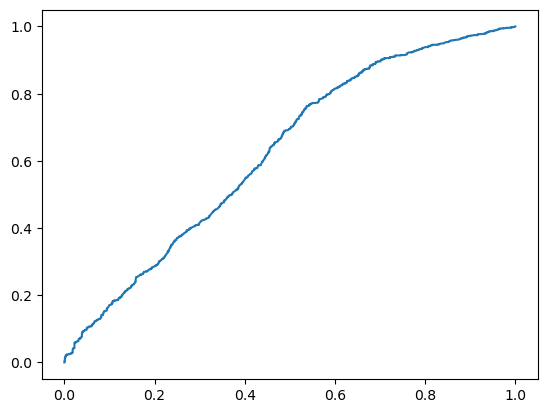

In [46]:
fpr,tpr,thresholds = roc_curve(y_test,logisticRegr.predict_proba(x_test)[:,0],pos_label=1) # Use column 0 because the label 1 is in position 0
plt.figure()
plt.plot(fpr,tpr)